In [1]:
import pandas as pd

# Loading the Dataset

In [2]:
df=pd.read_csv('C:/Users/Administrator/Desktop/Assignments/Assignment2_PGD B7/People Charm case.csv')

In [3]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


### Checking for Null Values in the data

In [4]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [5]:
df.skew()

satisfactoryLevel       -0.476360
lastEvaluation          -0.026622
numberOfProjects         0.337706
avgMonthlyHours          0.052842
timeSpent.company        1.853319
workAccident             2.021149
left                     1.230043
promotionInLast5years    6.636968
dtype: float64

In [6]:
df['promotionInLast5years'].value_counts()

0    14680
1      319
Name: promotionInLast5years, dtype: int64

In [7]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [8]:
df['dept'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

In [9]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [10]:
df1=df.copy()

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
x1=LabelEncoder()
df1['dept']=x1.fit_transform(df1['dept'])
df1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,low
1,0.80,0.86,5,262,6,0,1,0,7,medium
2,0.11,0.88,7,272,4,0,1,0,7,medium
3,0.37,0.52,2,159,3,0,1,0,7,low
4,0.41,0.50,2,153,3,0,1,0,7,low


In [13]:
df2=pd.get_dummies(df1,drop_first=True)

In [14]:
df2.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,7,1,0
1,0.80,0.86,5,262,6,0,1,0,7,0,1
2,0.11,0.88,7,272,4,0,1,0,7,0,1
3,0.37,0.52,2,159,3,0,1,0,7,1,0
4,0.41,0.50,2,153,3,0,1,0,7,1,0


In [15]:
corr=df2.corr()

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='seismic_r',annot=True)

In [17]:
from sklearn.feature_selection import SelectKBest, chi2
X = df2.loc[:,df2.columns!='left']
y = df2[['left']]
selector = SelectKBest(chi2, k=5)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['satisfactoryLevel', 'avgMonthlyHours', 'timeSpent.company',
       'workAccident', 'salary_low'],
      dtype='object')


# kNN Classifier

In [18]:
df_knn=df2[['satisfactoryLevel','workAccident','salary_low','left','timeSpent.company']]

In [19]:
x=df_knn.loc[:,df_knn.columns!='left']
y=df_knn[['left']]

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
x_train.shape

(11999, 4)

In [22]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x_train)
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
k_list=[i for i in range(1,41)]
for i in k_list:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    print('for',i,' kNN Score is:',knn.score(x_test,y_test)*100)


for 1  kNN Score is: 94.23333333333333
for 2  kNN Score is: 94.43333333333334
for 3  kNN Score is: 95.1
for 4  kNN Score is: 94.43333333333334
for 5  kNN Score is: 95.13333333333334
for 6  kNN Score is: 95.03333333333333
for 7  kNN Score is: 95.16666666666667
for 8  kNN Score is: 95.26666666666667
for 9  kNN Score is: 95.39999999999999
for 10  kNN Score is: 95.36666666666666
for 11  kNN Score is: 95.36666666666666
for 12  kNN Score is: 95.39999999999999
for 13  kNN Score is: 95.36666666666666
for 14  kNN Score is: 95.43333333333334
for 15  kNN Score is: 95.36666666666666
for 16  kNN Score is: 95.39999999999999
for 17  kNN Score is: 95.26666666666667
for 18  kNN Score is: 95.26666666666667
for 19  kNN Score is: 95.13333333333334
for 20  kNN Score is: 95.13333333333334
for 21  kNN Score is: 95.1
for 22  kNN Score is: 95.13333333333334
for 23  kNN Score is: 95.03333333333333
for 24  kNN Score is: 95.06666666666666
for 25  kNN Score is: 95.03333333333333
for 26  kNN Score is: 95.0
for 27  

## Choosing k=9

In [26]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [27]:
print('kNN Score=',knn.score(x_test,y_test)*100)
prediction=knn.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction)
print('Confusion matrix is=',cm,sep='\n')

kNN Score= 95.39999999999999
Confusion matrix is=
[[2178   73]
 [  65  684]]


In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2251
           1       0.90      0.91      0.91       749

    accuracy                           0.95      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.95      0.95      0.95      3000



In [30]:
from sklearn.metrics import roc_curve,auc
y_scores = knn.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

In [31]:
roc_auc

0.9745159991198097

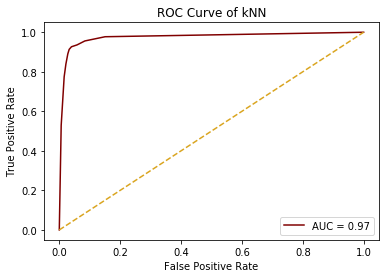

In [32]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'maroon', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],color='goldenrod',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## Accuracy- 95.39%               AUC- 0.974

# Logistic Regression

In [33]:
df_lr=df2[['satisfactoryLevel','workAccident','salary_low','left','timeSpent.company']]

In [34]:
x=df_lr.loc[:,df_lr.columns!='left']
y=df_lr['left']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [36]:
y_test.value_counts()

0    2838
1     912
Name: left, dtype: int64

In [37]:
ss=StandardScaler()
ss.fit(x_train)
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)

In [39]:
accuracy

0.7736

In [40]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[2661,  177],
       [ 672,  240]], dtype=int64)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      2838
           1       0.58      0.26      0.36       912

    accuracy                           0.77      3750
   macro avg       0.69      0.60      0.61      3750
weighted avg       0.74      0.77      0.74      3750



In [42]:
probability=lr.predict_proba(x_test)
prob_positive=probability[:,1]
fpr,tpr,threshold=roc_curve(y_test,prob_positive)
roc_auc=auc(fpr,tpr) 
roc_auc

0.7982347959398143

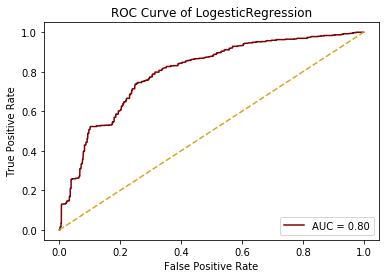

In [43]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'maroon', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],color='goldenrod',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of LogesticRegression')
plt.show()

## Accuracy- 77.36%               
## AUC- 0.7982

# Naive Bayes Classifier

In [44]:
df_new=df.copy()

In [45]:
df_new['salary']=df_new['salary'].replace({'low': 0, 'medium': 1,'high':2})

In [46]:
df_new.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.37,0.52,2,159,3,0,1,0,sales,0
4,0.41,0.50,2,153,3,0,1,0,sales,0


In [47]:
x1=LabelEncoder()
df_new['dept']=x1.fit_transform(df_new['dept'])
df_new.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,0
1,0.80,0.86,5,262,6,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,1
3,0.37,0.52,2,159,3,0,1,0,7,0
4,0.41,0.50,2,153,3,0,1,0,7,0


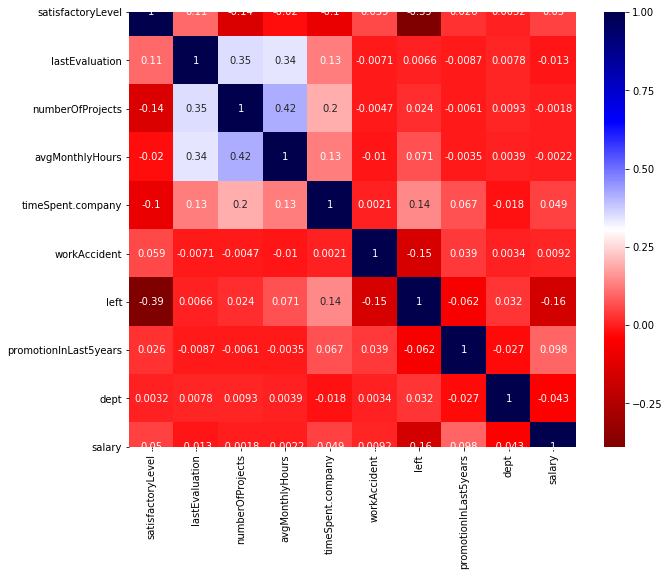

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(),cmap='seismic_r',annot=True)

In [49]:
df_nb=df_new[['satisfactoryLevel','workAccident','salary','left','timeSpent.company']]

In [50]:
x=df_nb.loc[:,df_nb.columns!='left']
y=df_nb[['left']]

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
ss.fit(x_train)
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [53]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8076666666666666

In [54]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[2024,  248],
       [ 329,  399]], dtype=int64)

In [55]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2272
           1       0.62      0.55      0.58       728

    accuracy                           0.81      3000
   macro avg       0.74      0.72      0.73      3000
weighted avg       0.80      0.81      0.80      3000



In [56]:
probability=gnb.predict_proba(x_test)
prob_positive=probability[:,1]
fpr,tpr,threshold=roc_curve(y_test,prob_positive)
roc_auc=auc(fpr,tpr) 
roc_auc

0.8022098939792601

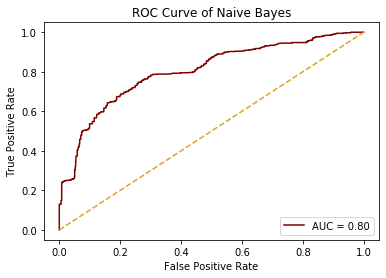

In [57]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'maroon', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],color='goldenrod',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes')
plt.show()

## Accuracy- 80.76%               
## AUC- 0.8022

# Decision Tree Classifier

In [58]:
df_d=df.copy()

In [59]:
df_dec_tree=pd.get_dummies(df_d,drop_first=True)

In [60]:
df_dec_tree.shape

(14999, 19)

In [61]:
df_dec_tree.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [62]:
x=df_dec_tree.loc[:,df_dec_tree.columns!='left']
y=df_dec_tree['left']

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.9797777777777777

In [65]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[3345,   60],
       [  31, 1064]], dtype=int64)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3405
           1       0.95      0.97      0.96      1095

    accuracy                           0.98      4500
   macro avg       0.97      0.98      0.97      4500
weighted avg       0.98      0.98      0.98      4500



In [67]:
probability=dt.predict_proba(x_test)
prob_positive=probability[:,1]
fpr,tpr,threshold=roc_curve(y_test,prob_positive)
roc_auc=auc(fpr,tpr) 
roc_auc

0.9770341761712228

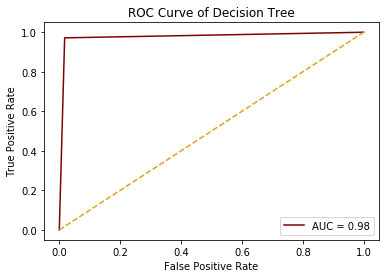

In [68]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'maroon', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],color='goldenrod',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision Tree')
plt.show()

## Accuracy- 97.97%               
## AUC- 0.9770

### With Pruning

In [69]:
dt=DecisionTreeClassifier(criterion= 'gini',splitter='random',max_leaf_nodes=20,\
                          min_samples_leaf=12, max_depth=10)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.9375555555555556

In [70]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[3215,  190],
       [  91, 1004]], dtype=int64)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      3405
           1       0.84      0.92      0.88      1095

    accuracy                           0.94      4500
   macro avg       0.91      0.93      0.92      4500
weighted avg       0.94      0.94      0.94      4500



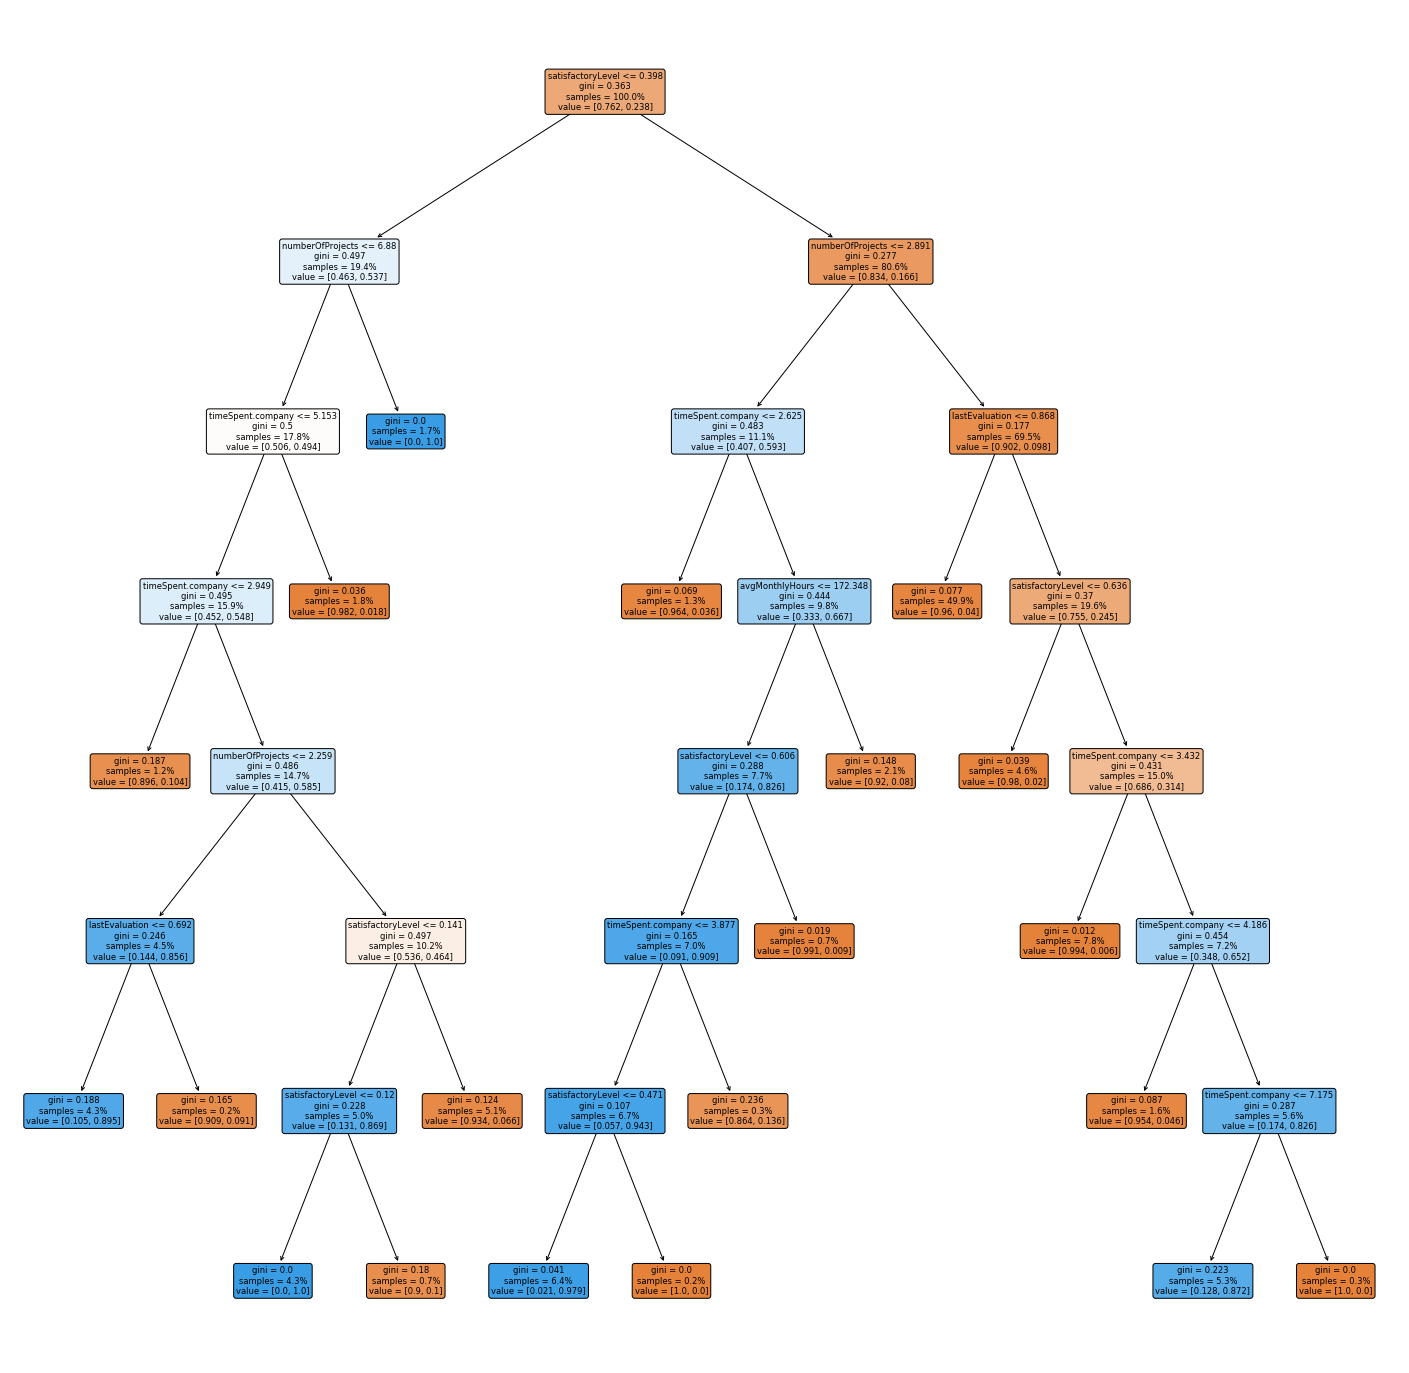

In [72]:
from sklearn import tree
cols=list(df_dec_tree.columns.values)

plt.figure(figsize=(25,25))

tree.plot_tree(dt.fit(x,y),feature_names=cols, filled=True, precision=3,proportion=True \
              ,rounded=True)
plt.show()

In [73]:
probability=dt.predict_proba(x_test)
prob_positive=probability[:,1]
fpr,tpr,threshold=roc_curve(y_test,prob_positive)
roc_auc=auc(fpr,tpr) 
roc_auc

0.9495380819235746

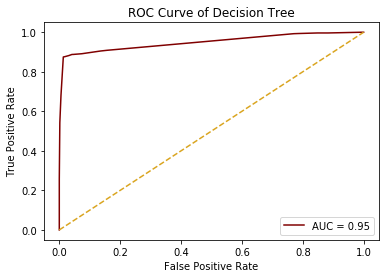

In [74]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'maroon', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],color='goldenrod',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision Tree')
plt.show()

# Random Forest Classifier

In [75]:
x=df_dec_tree.loc[:,df_dec_tree.columns!='left']
y=df_dec_tree['left']

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=150,random_state=0)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.9922222222222222

In [78]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[3400,    5],
       [  30, 1065]], dtype=int64)

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3405
           1       1.00      0.97      0.98      1095

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [80]:
probability=rfc.predict_proba(x_test)
prob_positive=probability[:,1]
fpr,tpr,threshold=roc_curve(y_test,prob_positive)
roc_auc=auc(fpr,tpr) 
roc_auc

0.9957399472974876

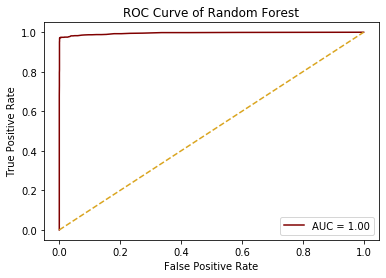

In [81]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'maroon', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],color='goldenrod',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()

## Accuracy- 99.22%               
## AUC- 0.9957

# Boosting

## 1. AdaBoost

In [82]:
x=df_dec_tree.loc[:,df_dec_tree.columns!='left']
y=df_dec_tree['left']

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [84]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier(n_estimators=150,random_state=0)
ab.fit(x_train,y_train)
y_pred=ab.predict(x_test)
accuracy_score(y_test,y_pred)

0.9586666666666667

In [85]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[3315,   90],
       [  96,  999]], dtype=int64)

In [86]:
probability=ab.predict_proba(x_test)
prob_positive=probability[:,1]
fpr,tpr,threshold=roc_curve(y_test,prob_positive)
roc_auc=auc(fpr,tpr) 
roc_auc

0.9830453469582068

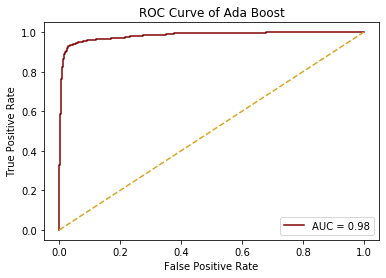

In [87]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'maroon', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],color='goldenrod',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Ada Boost')
plt.show()

## Accuracy- 95.86%               
## AUC- 0.983

## 2. Gradient Boosting

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=100,random_state=0,)
gb.fit(x_train,y_train)
y_pred=ab.predict(x_test)
accuracy_score(y_test,y_pred)

0.9586666666666667

In [89]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[3315,   90],
       [  96,  999]], dtype=int64)

In [90]:
probability=gb.predict_proba(x_test)
prob_positive=probability[:,1]
fpr,tpr,threshold=roc_curve(y_test,prob_positive)
roc_auc=auc(fpr,tpr) 
roc_auc

0.9904495805926015

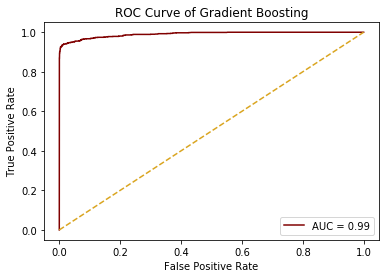

In [91]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'maroon', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],color='goldenrod',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Gradient Boosting')
plt.show()

## Accuracy- 95.86%                 
## AUC- 0.9904

## 3.XG Boost

In [92]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy_score(y_test,y_pred)

0.9768888888888889

In [93]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[3375,   30],
       [  74, 1021]], dtype=int64)

In [94]:
probability=xgb.predict_proba(x_test)
prob_positive=probability[:,1]
fpr,tpr,threshold=roc_curve(y_test,prob_positive)
roc_auc=auc(fpr,tpr) 
roc_auc

0.9901043992517048

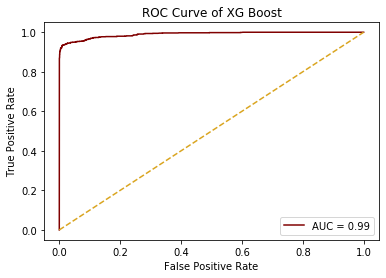

In [95]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'maroon', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],color='goldenrod',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of XG Boost')
plt.show()

## Accuracy- 97.68%               
## AUC- 0.9901

# Accuracy Scores For Each Classifier

#### kNN - 95.39
#### Logistic Regression-77.36
#### Naive Bayes- 80.76
#### Decision Tree- 98.2
#### Random Forest- 99.2
#### Ada Boost- 95.86
#### Gradient Boosting- 95.86
#### XG Boost- 97.68

# Area under the Curve

#### kNN - 0.974
#### Logistic Regression-0.798
#### Naive Bayes- 0.802
#### Decision Tree- 0.978
#### Random Forest- 0.995
#### Ada Boost- 0.983
#### Gradient Boosting- 0.9904
#### XG Boost- 0.9901

## Keeping Accuracy into consideration we can tell that Random Forest is the best classifier for the given dataset as it gives us 99.2% accuracy.
- Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.
- It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.
- It generates an internal unbiased estimate of the generalization error as the forest building progresses.
- It has methods for balancing error in class population unbalanced data sets.

## Do you feel accuracy is a good performance evaluation metric for the given data? If yes, justify your answer. If no, justify your answer and suggest alternative metric/s.

## No, according to me, accuracy is not a good performance evaluation metric for the given dataset. I believe that for the given dataset, area under the curve gives better and accurate result.

#### We can see that the accuracy given by decision tree classifier is more than the accuracy given by boosting techniques whereas the area under the curve was accurately given by the boosting techniques(Random Forest and Boosting techniques gave almost same AUC result) 
- AUC is better measure of classifier performance than accuracy because it does not bias on size of test or evaluation data.
- Accuracy depends on the threshold chosen, whereas the AUC considers all possible thresholds. Because of this it is often preferred as it provides a “broader” view of the performance of the classifier.
